<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_25_Spring_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 310  Lecture 25 - Spring 2021

## SVM with Radial Basis Function Kernel (the kernel "trick")

<figure>
<center>
<img src='https://drive.google.com/uc?id=1IuYqAUe7cV8pwxwTUlxQTVUPI2smrcME' 
width='1000px' />
<figcaption>SVM with Radial Basis Function Kernel</figcaption></center>
</figure>

For this we would need at least one landmark point $x_0$. The following is also called a "Gaussian" kernel

$$\Large
(x,y) \rightarrow \left(x,y,z:=e^{-\gamma[(x-x_0)^2+(y-y_0)^2]}\right)
$$

## Naive Bayes Classifier

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

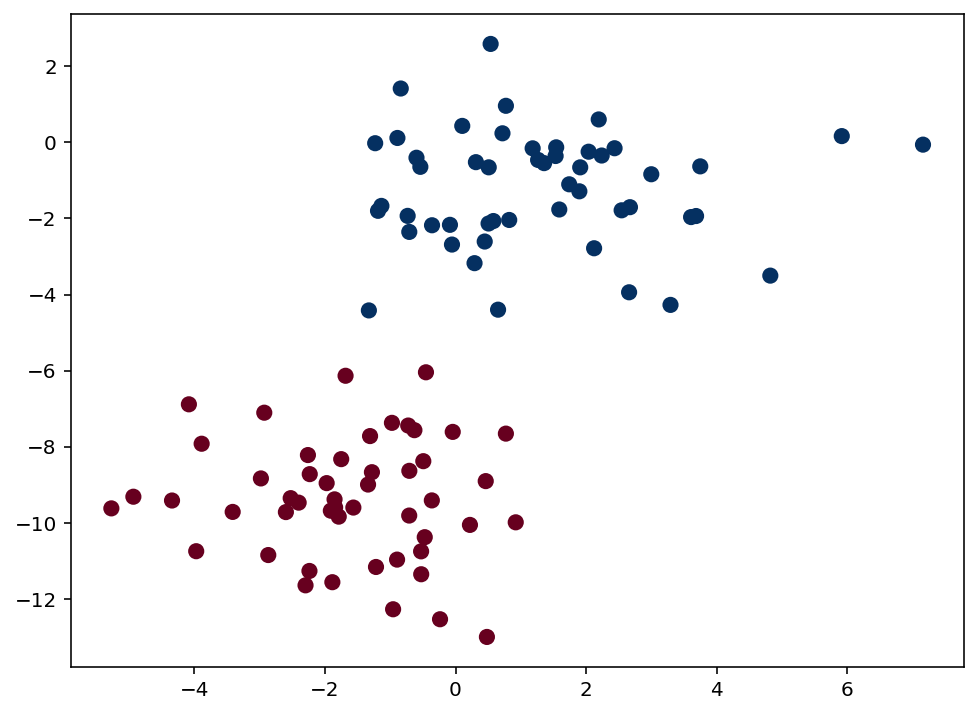

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns; sns.set_style("white")
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs
# Here we geneate some synthetic (random) data
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');
plt.show()

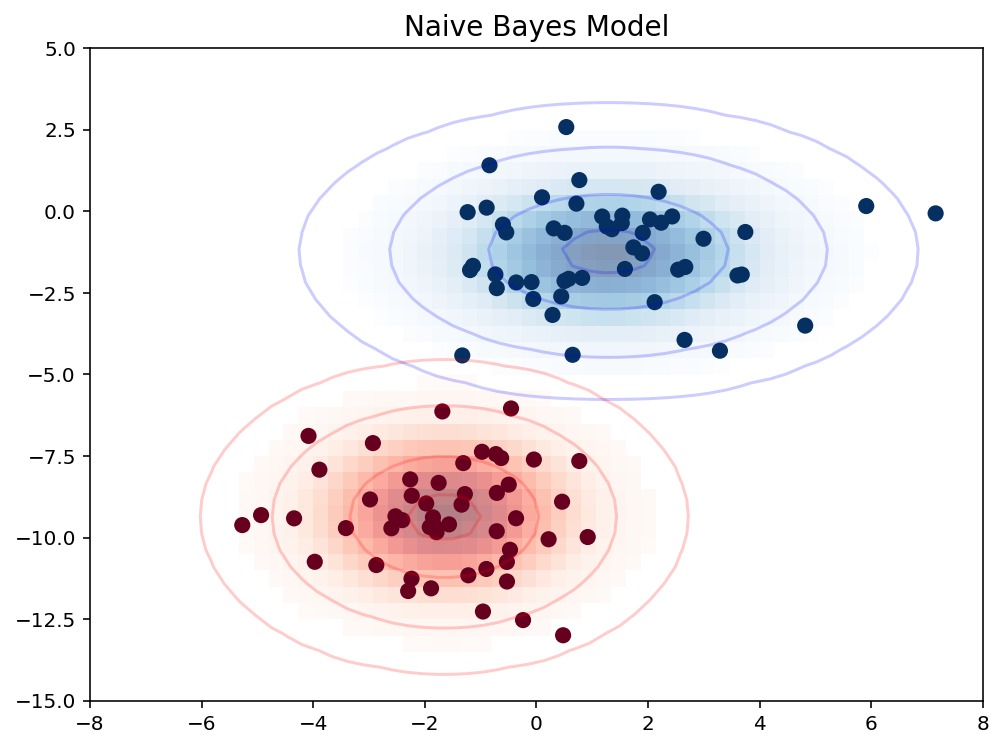

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

#Classification Algorithms - Real Data Application with Validation

In [ ]:
# imports
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as CM
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Real Data: Breast Cancer Data Set (sklearn)

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
dat = load_breast_cancer()
df = pd.DataFrame(data=dat.data, columns=dat.feature_names)

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y = dat.target
dat.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# here 0 means malignant and 1 means benign

## Here if we want to flip the labels such as 'benign' is Label 0 and 'malignant' is Label 1:

In [ ]:
yflipped = (y==0) +0

In [ ]:
yflipped

## Create a validation function

In [ ]:
model = LogisticRegression()
scale = StandardScaler()
from sklearn.model_selection import KFold

In [ ]:
def validation(X,y,k,model):
  PA_IV = []
  PA_EV = []
  pipe = Pipeline([('scale',scale),('Classifier',model)])
  kf = KFold(n_splits=k,shuffle=True,random_state=1234)
  for idxtrain, idxtest in kf.split(X):
    X_train = X[idxtrain,:]
    y_train = y[idxtrain]
    X_test = X[idxtest,:]
    y_test = y[idxtest]
    pipe.fit(X_train,y_train)
    PA_IV.append(accuracy_score(y_train,pipe.predict(X_train)))
    PA_EV.append(accuracy_score(y_test,pipe.predict(X_test)))
  return np.mean(PA_IV), np.mean(PA_EV)

In [ ]:
X = df.values
validation(X,y,10,model)

(0.9884788468567252, 0.9736528822055138)

## The Receiver Operating Characteristic (ROC)

True Positives Rate:

$$\frac{TP}{TP+FN}$$

False Positives Rate:

$$\frac{FP}{FP+TN}$$

If we plot the TPR against FPR we obtain the ROC curve. For a good classification we want that the area under the ROC curve to be as close to 1 as possible.

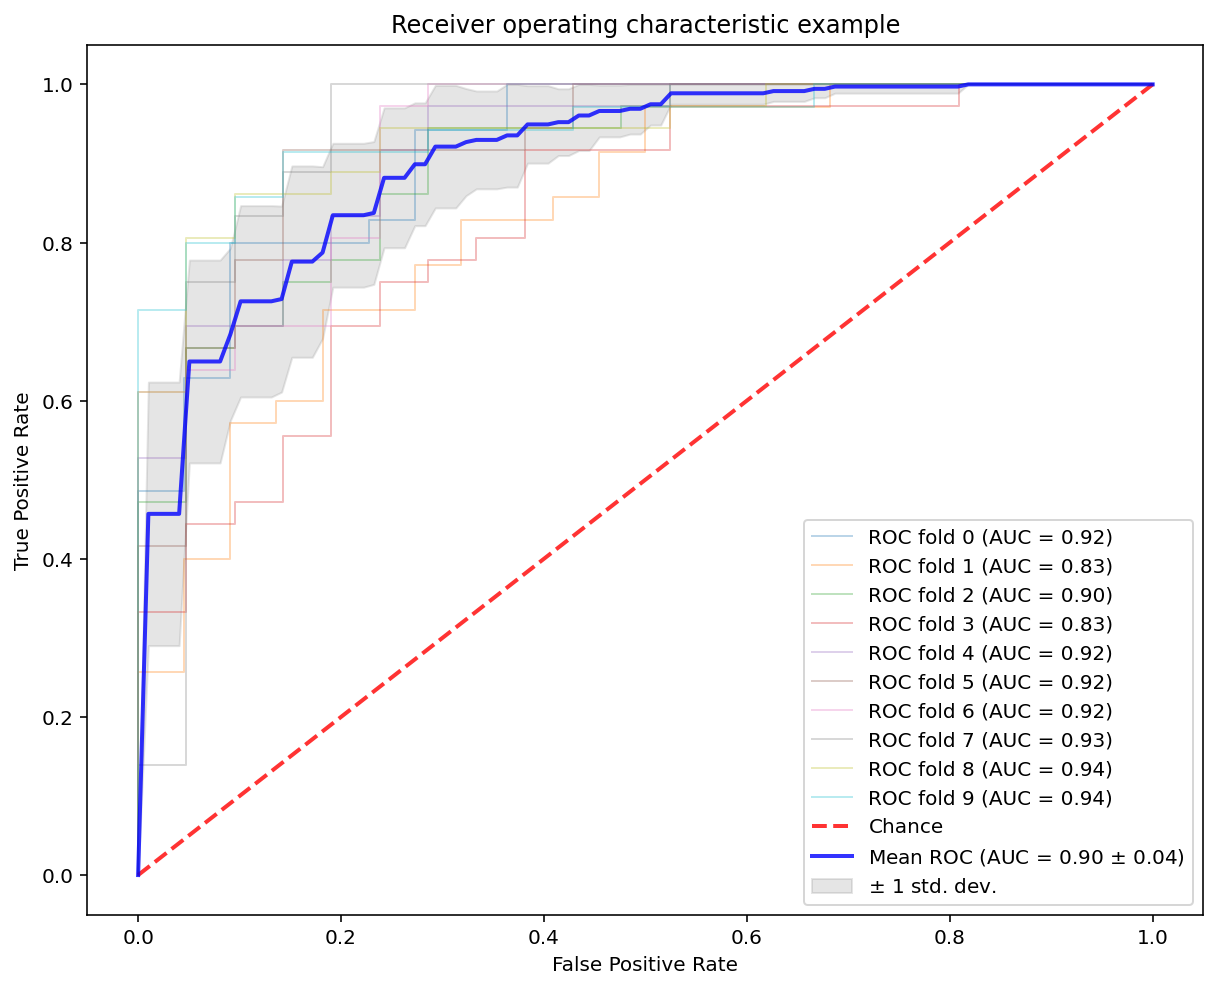

In [ ]:
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
ctscan = datasets.load_breast_cancer()
X = ctscan.data

y = ctscan.target
X, y = X[y != 2], y[y != 2]

n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10,8))
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [ ]:
X.shape

(569, 402)